In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("Train.csv")

# A) Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())
# B) Check basic information about the dataset
print("Dataset Information:")
print(df.info())
# C) Get the names of each column
print("Column Names:")
print(df.columns.tolist())
# D) Check the data types of each column
print("Data Types of Each Column:")
print(df.dtypes)
# E) Check for missing values in each column
print("Missing Values in Each Column:")
print(df.isnull().sum())
# F) Check for duplicate entries
print("Number of Duplicate Rows:")
print(df.duplicated().sum())
# G) Count unique values in each column
print("Number of Unique Values per Column:")
print(df.nunique())
# H) Generate statistics for numerical data
numerical_df = df.select_dtypes(include="number")
print("Statistics for Numerical Columns:")
print(numerical_df.describe())
# I) Check skewness of numerical columns
print("Skewness of Numerical Columns:")
print(numerical_df.skew())
# J) Compute value counts for categorical data
categorical_columns = df.select_dtypes(include="object").columns

if not categorical_columns.empty:
    for col in categorical_columns:
        print(f"\nColumn: {col}")
        print(df[col].value_counts())
else:
    print("No categorical columns found in the dataset.")

First 5 rows of the dataset:
          ID         country age_group        travel_with  total_female  \
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0   
1    tour_10  UNITED KINGDOM     25-44                NaN           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24                NaN           1.0   

   total_male                         purpose     main_activity  \
0         1.0            Leisure and Holidays  Wildlife tourism   
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  ... package_transport_tz  \
0            Friends, relatives      In

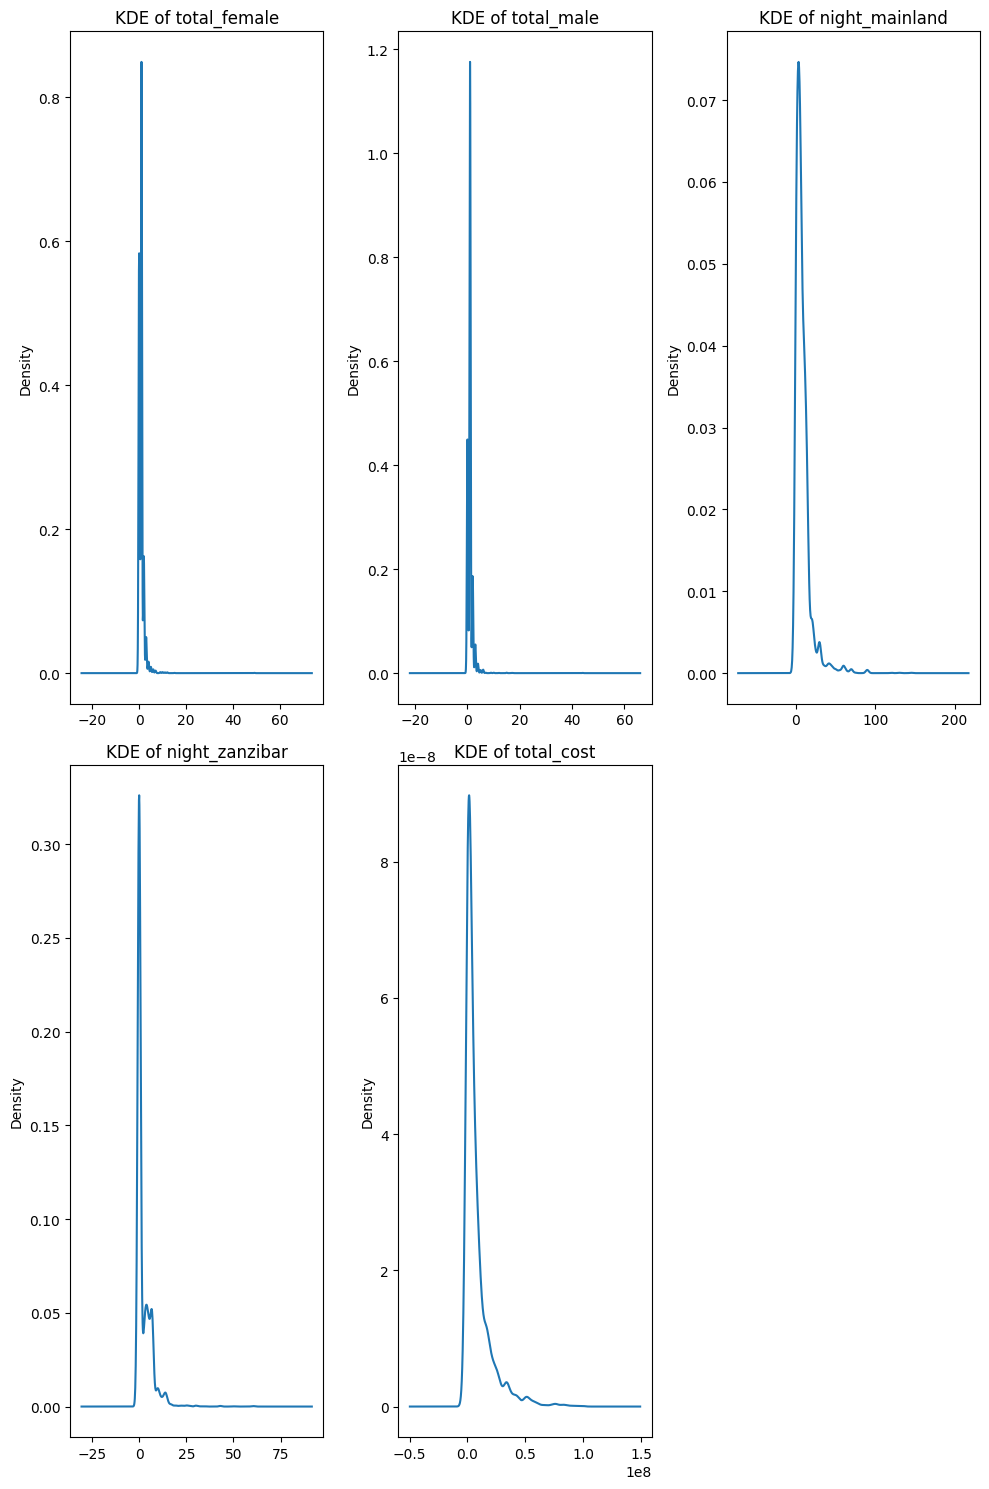

In [69]:
plt.figure(figsize=(10,15))
for i, col in enumerate(numerical_df.columns.tolist()):
  plt.subplot(2,3,i+1)
  df[col].plot(kind='kde')
  plt.title(f"KDE of {col}")
plt.tight_layout()
plt.show()

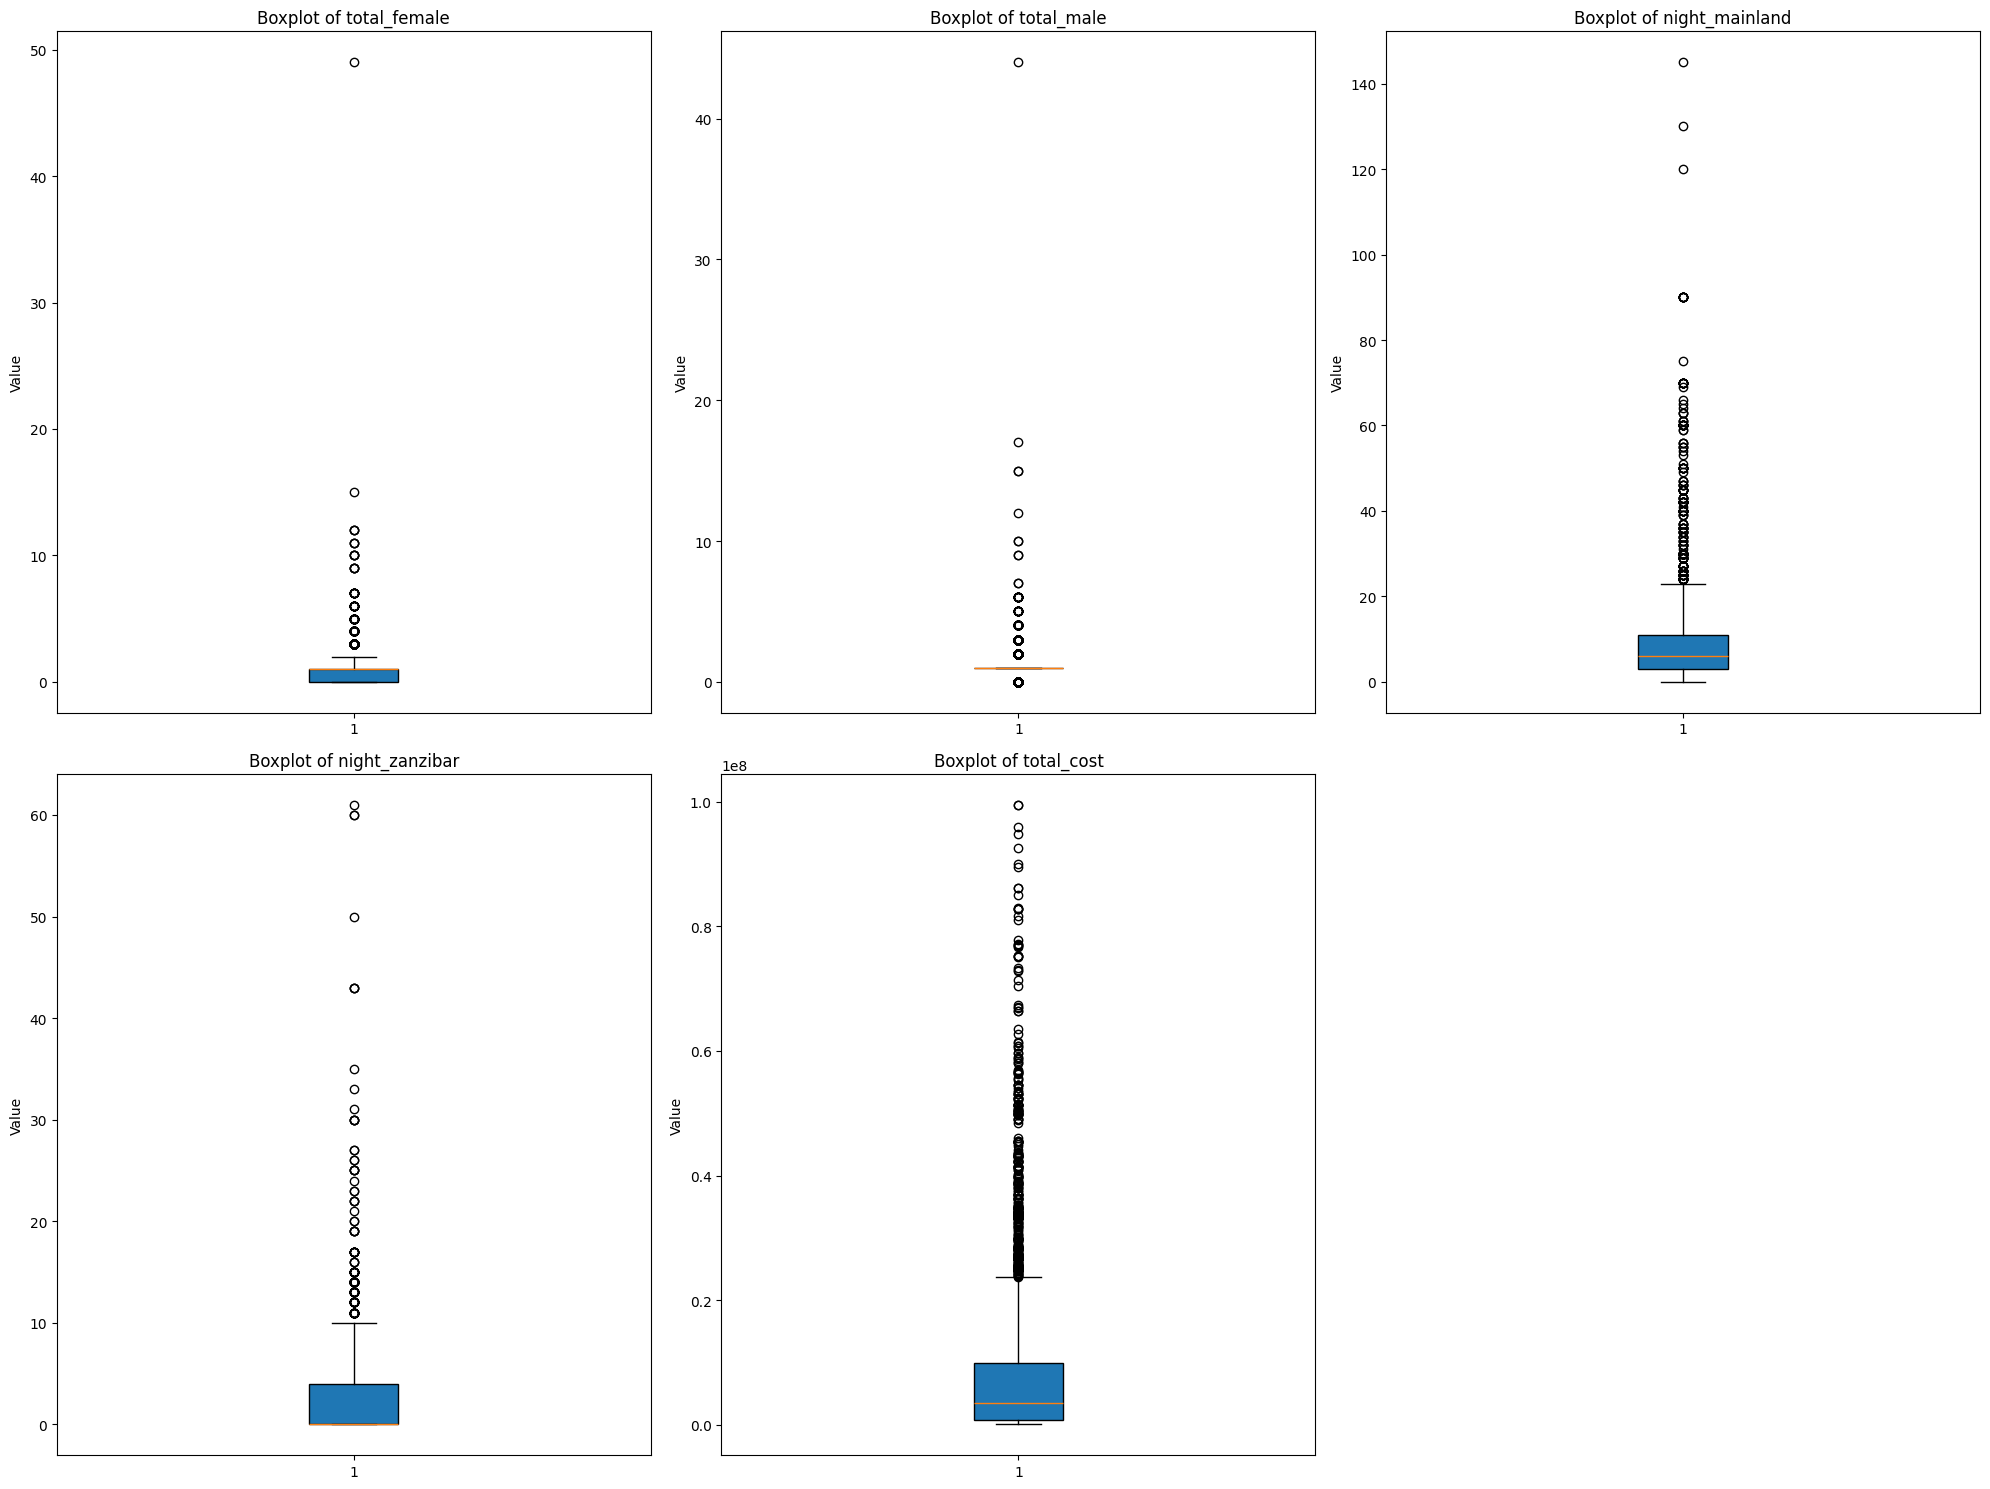

In [70]:
plt.figure(figsize=(20,15))
for i, col in enumerate(numerical_df.columns.tolist()):
  plt.subplot(2,3,i+1)
  plt.boxplot(df[col].dropna(), patch_artist=True)
  plt.ylabel("Value")
  plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [71]:
number_columns = numerical_df.columns.tolist()
df[number_columns] = df[number_columns].fillna(df[number_columns].median())
for col in number_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Count of outliers in {col}: {outliers.shape[0]}")

Count of outliers in total_female: 256
Count of outliers in total_male: 1843
Count of outliers in night_mainland: 274
Count of outliers in night_zanzibar: 186
Count of outliers in total_cost: 424


In [72]:
for col in number_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col]<lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col]>upper_bound, upper_bound, df[col])

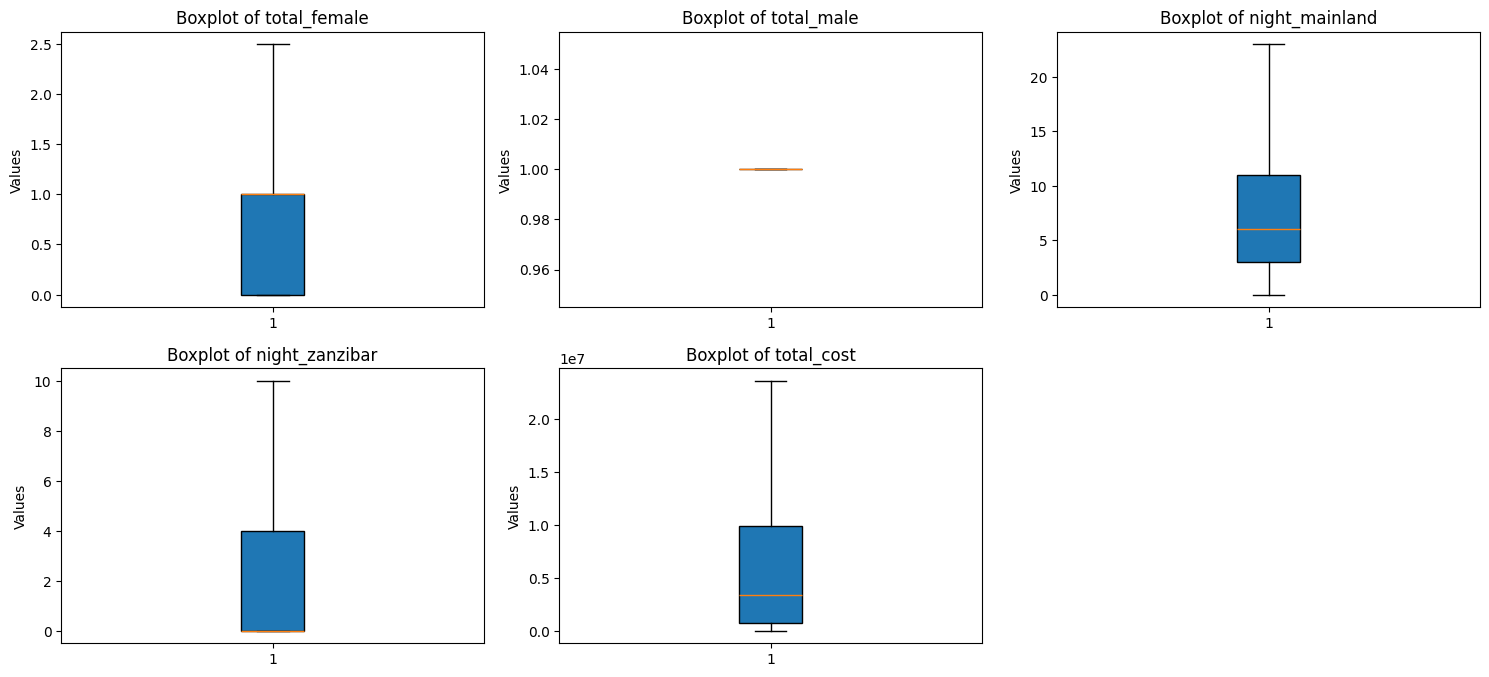

In [73]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_df.columns.tolist()):
    plt.subplot(3,3,i+1)
    plt.boxplot(df[col].dropna(), patch_artist=True)
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')
plt.tight_layout()
plt.show()

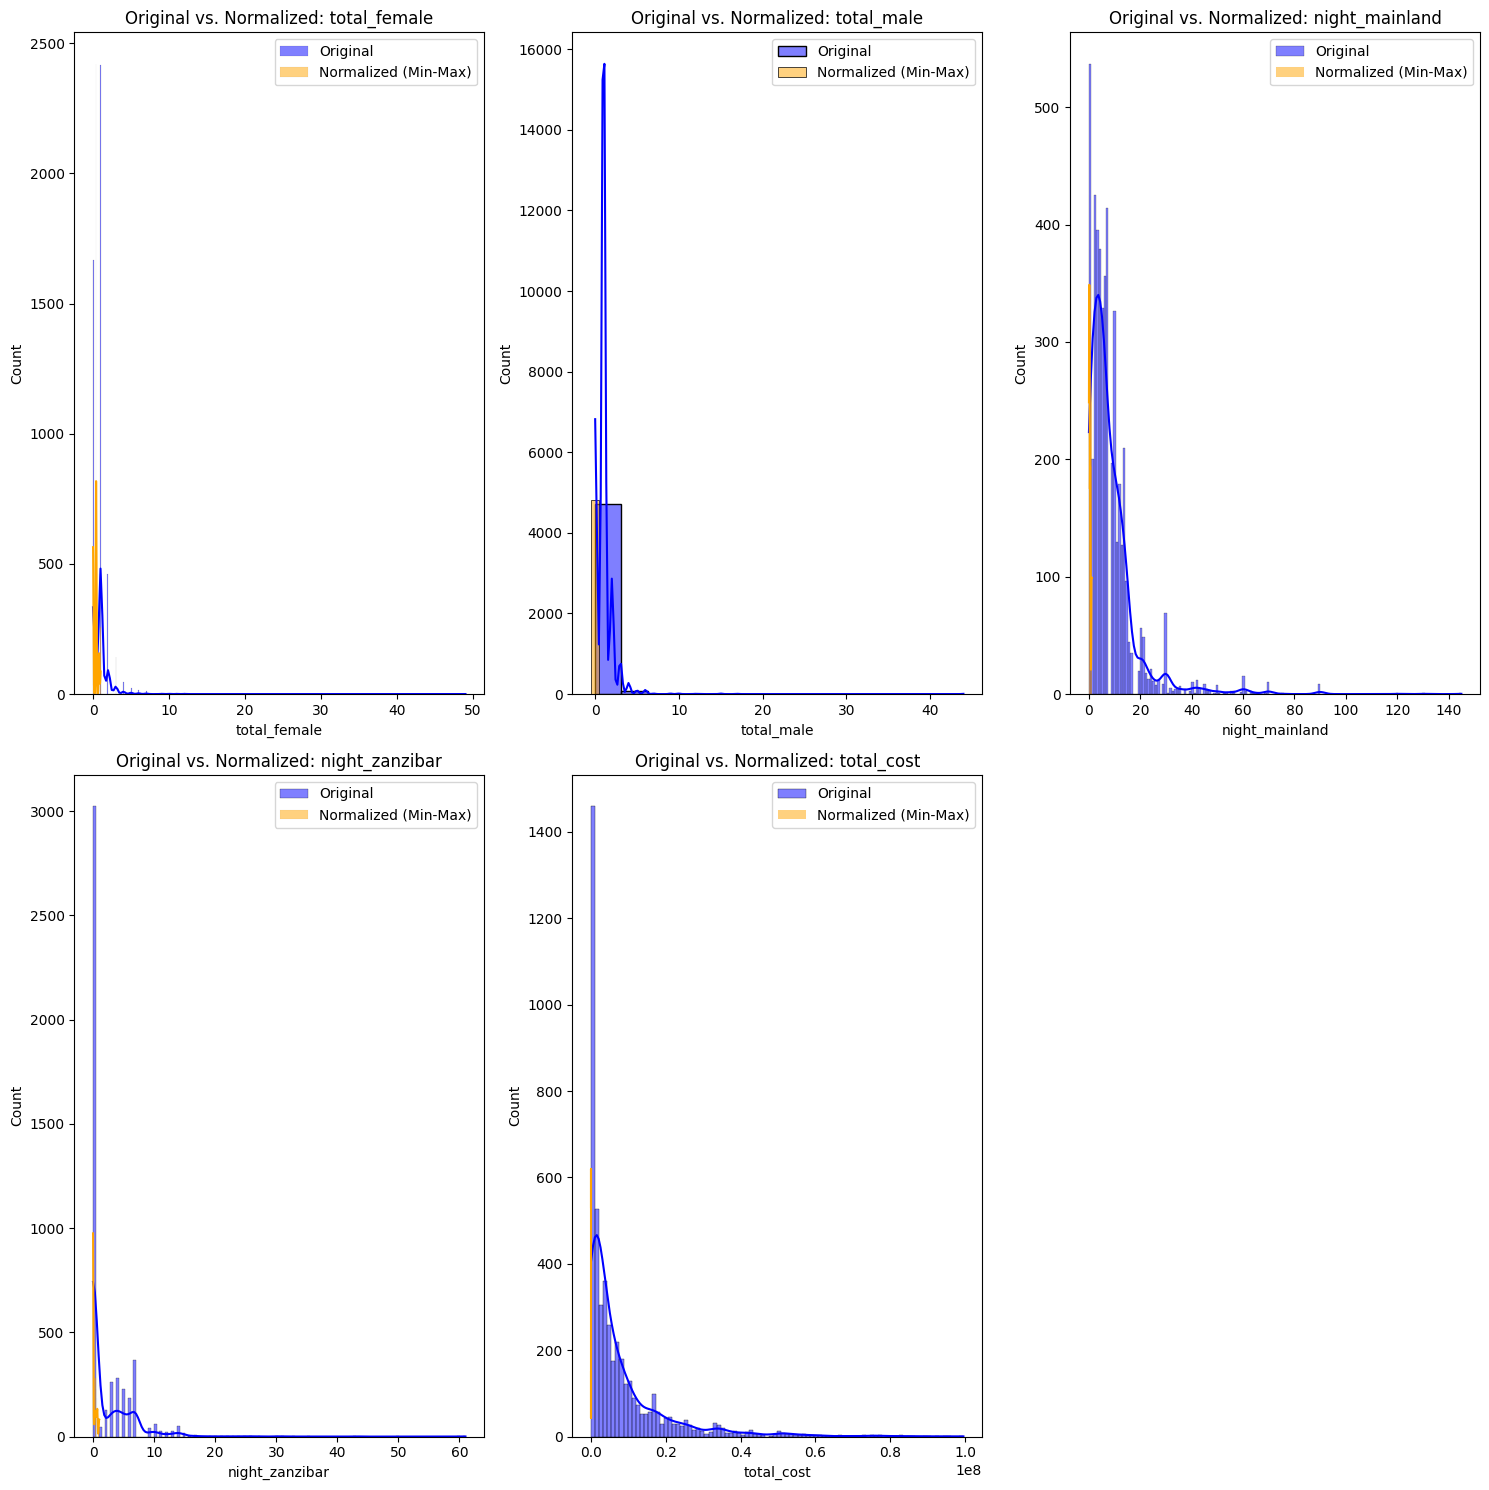

In [74]:
# normalization and standerdization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[number_columns] = scaler_minmax.fit_transform(df_minmax[number_columns])
# Apply Standardization (Z-score)
scaler_standard = StandardScaler()
df_standard = df.copy()
df_standard[number_columns] = scaler_standard.fit_transform(df_standard[number_columns])
plt.figure(figsize=(15, 15))
for i, col in enumerate(number_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(numerical_df[col], label="Original", kde=True, color='blue')
    sns.histplot(df_minmax[col], label="Normalized (Min-Max)", kde=True, color='orange')
    plt.title(f"Original vs. Normalized: {col}")
    plt.legend()
plt.tight_layout()
plt.show()

                night_zanzibar  night_mainland  total_cost
night_zanzibar             NaN             NaN         NaN
night_mainland             NaN             NaN         NaN
total_cost                 NaN             NaN         NaN


c:\Users\mohamed osama\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mohamed osama\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


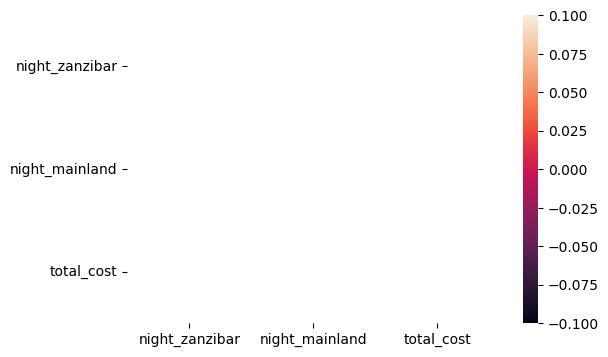

Before Transformation Skewness: nan
Before Transformation Kurtosis: nan
After Transformation Skewness: nan
After Transformation Kurtosis: nan
total_female      0.532463
total_male        0.000000
night_mainland    0.984994
night_zanzibar    1.255156
total_cost             NaN
dtype: float64
error*************************************************
        ID  country  age_group  travel_with  total_female  total_male  \
0        0       89          2            2           0.4         0.0   
1        1       99          1            0           0.4         0.0   
2        2       99          1            0           0.0         0.0   
3        3       99          1            3           0.4         0.0   
4        4       13          0            0           0.4         0.0   
...    ...      ...        ...          ...           ...         ...   
4804  4804       95          2            0           0.0         0.0   
4805  4805      100          1            3           0.4         0.0

In [97]:
heatmap_data = df[['night_zanzibar', 'night_mainland', 'total_cost']].dropna()
heatmap_data
# Two different methods to convert boolean data into numerical data (1 and 0)
heatmap_data['night_zanzibar'] = heatmap_data['night_zanzibar'].map({True: 1, False: 0})
heatmap_data['night_mainland'] = heatmap_data['night_mainland'].astype(int)
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data.corr(), annot=True)
print(heatmap_data.corr())
plt.show() 
#1. Impute missing numerical values
numerical_columns_list = df.select_dtypes(include="number").columns.tolist()
df[numerical_columns_list] = df[numerical_columns_list].fillna(df[numerical_columns_list].median())

#2. Impute missing categorical values
categorical_columns_list = df.select_dtypes(include="object").columns.tolist()
df[categorical_columns_list] = df[categorical_columns_list].fillna(df[categorical_columns_list].mode().iloc[0])
#1. Recheck the skewness and kurtosis of the target variable after missing value filling, and outlier
#   removal
print(f"Before Transformation Skewness: {df['total_cost'].skew()}")
print(f"Before Transformation Kurtosis: {df['total_cost'].kurt()}")

#2. Applying Log transformation to help make it more normal-like
df['total_cost'] = np.log(df['total_cost'])

#Calculate the Skewness and Kurtosis of output variable
print(f"After Transformation Skewness: {df['total_cost'].skew()}")
print(f"After Transformation Kurtosis: {df['total_cost'].kurt()}")
#3. Normalize numerical features using the appropriate technique
skewness = df[numerical_df.columns].skew()
print(skewness)
z_score = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
min_max = skewness[(skewness < -0.5) | (skewness > 0.5)]
print('error*************************************************')
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[min_max.index] = scaler.fit_transform(df_normalized[min_max.index])
scaler = StandardScaler()
# df_normalized[z_score.index] = scaler.fit_transform(df_normalized[z_score.index])
#4. Perform One-Hot encoding on categorical features
categorical_cols = df_normalized.select_dtypes(include=['object']).columns

scaler_minmax = MinMaxScaler()
df[min_max.index] = scaler_minmax.fit_transform(df[min_max.index])


# Standard Scaling
scaler_standard = StandardScaler()
df[z_score.index] = scaler_standard.fit_transform(df[z_score.index])


# Encode categorical features using One-Hot Encoding
from sklearn.preprocessing import LabelEncoder

df_encoded = df_normalized.copy()
label_encoder = LabelEncoder()

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
print(df_encoded)
df_encoded.to_csv('encoded.csv',index=False)

# encoded_df = pd.get_dummies(df_normalized, columns=categorical_cols, drop_first=False)
# print('error*************************************************')
# encoded_df.info()
# bool_df = encoded_df.select_dtypes(include="bool")
# bool_df['total_cost'] = df['total_cost']
# print('error*************************************************')
# correlation_matrix = bool_df.corr()
# print('error*************************************************')
# correlation_matrix.style.background_gradient()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Filter out zero or negative total_cost to avoid -inf on log transform
df_filtered = df[df['total_cost'] > 0].copy()

# 2. Log transform the target variable
df_filtered['total_cost'] = np.log(df_filtered['total_cost'])

# 3. Simple encoding of categorical variables using pandas get_dummies
categorical_cols = df_filtered.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df_filtered, columns=categorical_cols, drop_first=True)

# 4. Drop rows with NaN or infinite values (just in case)
df_encoded = df_encoded.replace([np.inf, -np.inf], np.nan).dropna(subset=['total_cost'])

# 5. Separate features and target
X = df_encoded.drop(columns=['total_cost'])
y = df_encoded['total_cost']

# Sanity check
print("Rows after cleaning:", len(df_encoded))
if len(df_encoded) == 0:
    raise ValueError("No data left after cleaning target variable.")

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Scale only numerical columns
numerical_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 8. Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(
    n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42
)
gb_model.fit(X_train, y_train)

# 9. Predict and invert log transform for evaluation
y_pred_log = gb_model.predict(X_test)
y_pred = np.exp(y_pred_log)
y_test_original = np.exp(y_test)

# 10. Evaluate model
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
r2_log = r2_score(y_test, y_pred_log)

rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2_original = r2_score(y_test_original, y_pred)

print("\nGradient Boosting Regression Results:")
print(f"RMSE (Log scale): {rmse_log:.4f}")
print(f"R² (Log scale): {r2_log:.4f}")
print(f"RMSE (Original scale): {rmse_original:.4f}")
print(f"R² (Original scale): {r2_original:.4f}")


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
test_df=pd.read_csv("Test.csv")
test_tourID=test_df["ID"].copy()
test_predictions=rf_model.predict(test_df_scaled)

submission=pd.DataFrame({
    "Tour ID" : test_tourID ,
    "Total Cost" : test_predictions
})

submission_file="Total_Cost_Result"
submission.to_csv(submission_file,index=False)




NameError: name 'test_df_scaled' is not defined